In [1]:
# $ pip install jupyter matplotlib seaborn

# setup path for dev library
import sys
sys.path.append('../')

# import this package
from pyghcn.client import *
from pyghcn.data import *

In [2]:
# import libraries
import datetime
import numpy
import matplotlib.pyplot as plt
import seaborn

# ipython widget setup
import ipywidgets
from IPython.display import display

In [3]:
# get and parse station data
station_df = get_station_list_data()

In [4]:
widget_lat = ipywidgets.BoundedFloatText(
    value=41.220,
    min=-90,
    max=90,
    step=0.001,
    description='Latitude:',
    disabled=False
)

widget_long = ipywidgets.BoundedFloatText(
    value=-112.406,
    min=-180,
    max=180,
    step=0.001,
    description='Longitude:',
    disabled=False
)

widget_radius_unit = ipywidgets.Dropdown(
    options=[('Kilometer', 'km'),
             ('Mile', 'mi'),
             ],
    value='mi',
    description='Radius Unit:',
    disabled=False
)

widget_radius_value = ipywidgets.BoundedFloatText(
    value=30,
    min=0,
    max=1000,
    step=0.1,
    description='Radius:',
    disabled=False
)

display(widget_lat, widget_long, widget_radius_unit, widget_radius_value)

BoundedFloatText(value=41.22, description='Latitude:', max=90.0, min=-90.0, step=0.001)

BoundedFloatText(value=-112.406, description='Longitude:', max=180.0, min=-180.0, step=0.001)

Dropdown(description='Radius Unit:', index=1, options=(('Kilometer', 'km'), ('Mile', 'mi')), value='mi')

BoundedFloatText(value=30.0, description='Radius:', max=1000.0, step=0.1)

In [5]:
# get nearest stations
nearby_stations = get_nearby_stations(station_df,
                                      widget_lat.value,
                                      widget_long.value,
                                      widget_radius_value.value,
                                      widget_radius_unit.value)
print(f"Loaded {len(nearby_stations)} stations.")

Loaded 51 stations.


In [6]:
# retrieve data from these stations
daily_tmin_station_data = {}
daily_tmax_station_data = {}
daily_prcp_station_data = {}

for station_id in nearby_stations:
    daily_df = get_station_daily_data(station_id)
    print(station_id, daily_df['YEAR'].min(), daily_df['YEAR'].max())

    daily_tmin_station_data[station_id] = extract_series_from_daily_data("TMIN", daily_df).replace(-9999, numpy.nan)
    daily_tmax_station_data[station_id] = extract_series_from_daily_data("TMAX", daily_df).replace(-9999, numpy.nan)
    daily_prcp_station_data[station_id] = extract_series_from_daily_data("PRCP", daily_df).replace(-9999, numpy.nan)

US1UTBE0002 2008 2022
US1UTBE0009 2010 2022
US1UTBE0014 2015 2022
US1UTDV0001 2008 2022
US1UTDV0005 2008 2021
US1UTDV0017 2011 2015
US1UTDV0020 2009 2012
US1UTDV0024 2013 2022
US1UTDV0040 2020 2022
US1UTWB0001 2008 2022
US1UTWB0003 2008 2022
US1UTWB0005 2008 2011
US1UTWB0008 2009 2018
US1UTWB0009 2010 2011
US1UTWB0011 2009 2011
US1UTWB0012 2010 2010
US1UTWB0015 2010 2015
US1UTWB0017 2011 2013
US1UTWB0018 2011 2019
USC00420194 1952 1972
USC00420197 1973 1983
USC00420490 1969 1996
USC00420506 1937 1984
USC00420924 1899 1974
USC00420928 1974 2022
USC00421731 1896 2006
USC00422726 1948 2016
USC00424050 1911 1913
USC00424140 1980 1981
USC00424846 1951 1968
USC00424970 2011 2013
USC00425607 1911 1981
USC00426400 1893 1940
USC00426404 1902 2010
USC00426405 2011 2022
USC00426414 1924 2009
USC00426869 1935 2022
USC00427050 1896 1913
USC00427052 1981 1994
USC00427318 1914 1991
USC00427438 1916 1919
USC00427565 1966 1968
USC00427924 1981 1984
USC00428885 1940 1960
USC00429346 1962 2022
USR0000BUE

In [7]:
# get average time series
tmin_mean_ts = pandas.DataFrame(daily_tmin_station_data).mean(axis=1)
tmax_mean_ts = pandas.DataFrame(daily_tmax_station_data).mean(axis=1)
prcp_mean_ts = pandas.DataFrame(daily_prcp_station_data).mean(axis=1)

# get range time series
tmin_std_ts = pandas.DataFrame(daily_tmin_station_data).std(axis=1)
tmax_std_ts = pandas.DataFrame(daily_tmax_station_data).std(axis=1)
prcp_std_ts = pandas.DataFrame(daily_prcp_station_data).std(axis=1)

# get range time series
tmin_range_ts = pandas.DataFrame(daily_tmin_station_data).max(axis=1) - pandas.DataFrame(daily_tmin_station_data).min(axis=1)
tmax_range_ts = pandas.DataFrame(daily_tmax_station_data).max(axis=1) - pandas.DataFrame(daily_tmax_station_data).min(axis=1)
prcp_range_ts = pandas.DataFrame(daily_prcp_station_data).max(axis=1) - pandas.DataFrame(daily_prcp_station_data).min(axis=1)

In [8]:
# get start year
widget_start_year = ipywidgets.BoundedIntText(
    value=2000,
    min=1900,
    max=datetime.date.today().year,
    step=1,
    description='Start Year:',
    disabled=False
)

display(widget_start_year)

BoundedIntText(value=2000, description='Start Year:', max=2022, min=1900)

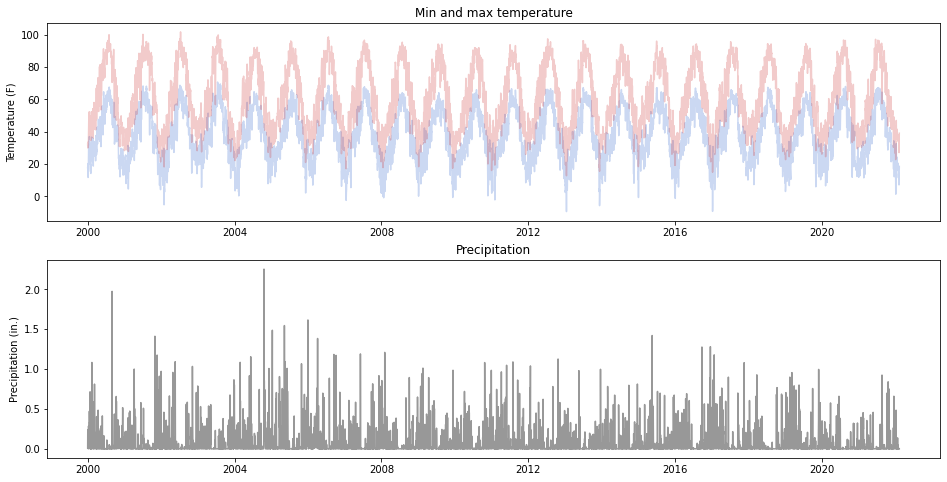

In [9]:
# get only recent data
start_date = datetime.date(widget_start_year.value, 1, 1)

f, ax  = plt.subplots(2, 1, figsize=(16, 8))

_ = ax[0].plot((tmin_mean_ts.loc[tmin_mean_ts.index >= start_date] / 10.0 * 9 / 5) + 32, color='#3366cc', alpha=0.25)
_ = ax[0].plot((tmax_mean_ts.loc[tmax_mean_ts.index >= start_date] / 10.0 * 9 / 5) + 32, color='#cc3333', alpha=0.25)
_ = ax[0].set_title("Min and max temperature")
_ = ax[0].set_ylabel("Temperature (F)")

_ = ax[1].plot((prcp_mean_ts.loc[prcp_mean_ts.index >= start_date] / 10) / 25, color='#333333', alpha=0.5)
_ = ax[1].set_title("Precipitation")
_ = ax[1].set_ylabel("Precipitation (in.)")


In [10]:
# get start year
widget_temp_threshold = ipywidgets.BoundedFloatText(
    value=33,
    min=-100,
    max=100,
    step=0.1,
    description='Freeze Temp (F):',
    disabled=False
)

window_start_md = (1, 1)
window_end_md = (6, 30)

display(widget_temp_threshold)

BoundedFloatText(value=33.0, description='Freeze Temp (F):', min=-100.0, step=0.1)

In [11]:
# set thresholds and dates
threshold = (widget_temp_threshold.value - 32) * 5/9

# build table and output
lf_table_rows = []
for year in range(2000, 2021):
    year_fh_min_ts = tmin_mean_ts.loc[(tmin_mean_ts.index >= datetime.date(year, 
                                                                           window_start_md[0],
                                                                           window_start_md[1])) & 
                                   (tmin_mean_ts.index <= datetime.date(year,
                                                                        window_end_md[0],
                                                                        window_end_md[1]))]
    fh_frost_dates = year_fh_min_ts.index[year_fh_min_ts <= threshold]
    fh_frost_day_counts = [(d - datetime.date(year, 1, 1)).days for d in fh_frost_dates]
    d0_count = (fh_frost_dates[-1] - datetime.date(year, 1, 1)).days
    lf_table_rows.append((year,
                          d0_count,
                          fh_frost_dates[-1],
                          year_fh_min_ts.loc[fh_frost_dates[-1]] / 10.0 * 9 / 5 + 32,
                          fh_frost_dates[-2],
                          year_fh_min_ts.loc[fh_frost_dates[-2]] / 10.0 * 9 / 5 + 32,
                          fh_frost_dates[-3],
                          year_fh_min_ts.loc[fh_frost_dates[-3]] / 10.0 * 9 / 5 + 32,                         
                         ))
    
# build df and output tail
lf_table_df  = pandas.DataFrame(lf_table_rows, columns=["year", "d0_count",
                                                        "d0", "t0",
                                                       "d1", "t1",
                                                       "d2", "t2"])
lf_table_df.tail()

,year,d0_count,d0,t0,d1,t1,d2,t2
16,2016,106,2016-04-16,31.66,2016-04-15,31.82,2016-04-06,31.84
17,2017,137,2017-05-18,27.64,2017-05-17,30.10,2017-04-29,30.34
18,2018,107,2018-04-18,27.10,2018-04-17,29.92,2018-04-14,30.84
19,2019,121,2019-05-02,31.62,2019-05-01,30.90,2019-04-13,31.88
20,2020,108,2020-04-18,30.96,2020-04-17,24.94,2020-04-16,29.14


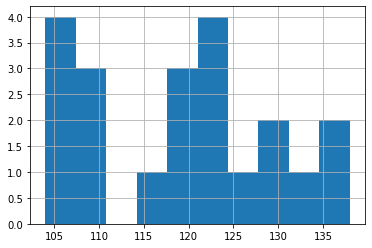

In [16]:
_ = lf_table_df["d0_count"].hist()

In [12]:
# setup percentile threshold widget
widget_percentile = ipywidgets.BoundedIntText(
    value=90,
    min=0,
    max=100,
    step=1,
    description='Percentile:',
    disabled=False
)

display(widget_percentile)

BoundedIntText(value=90, description='Percentile:')

In [13]:
# get percentile date for this year
d0_pct_value = lf_table_df["d0_count"].quantile(widget_percentile.value / 100.0)
pct_estimate_date = datetime.date(datetime.date.today().year, 1, 1) + datetime.timedelta(days=d0_pct_value)
print(f"Estimated {widget_percentile.value} %-tile frost date: {pct_estimate_date}")

Estimated 90 %-tile frost date: 2022-05-13
